In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score,precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
train_label = pd.read_csv("/content/drive/MyDrive/RICHTER DATA/train_labels.csv")
train_value = pd.read_csv("/content/drive/MyDrive/RICHTER DATA/train_values.csv")
test_value = pd.read_csv("/content/drive/MyDrive/RICHTER DATA/test_values.csv")

In [ ]:
train_df = pd.merge(train_value, train_label)

In [ ]:
# Drop duplicates
print("Dataset defore dropping duplicates: ",train_df.shape)
train_df.drop_duplicates(inplace=True, keep = 'last')
print("Dataset after dropping duplicates: ",train_df.shape)

Dataset defore dropping duplicates:  (260601, 40)
Dataset after dropping duplicates:  (260601, 40)


In [ ]:
# Drop NaN
print("Dataset defore dropping NaN: ",train_df.shape)
train_df.dropna(inplace=True)
print("Dataset after dropping NaN: ",train_df.shape)

Dataset defore dropping NaN:  (260601, 40)
Dataset after dropping NaN:  (260601, 40)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [ ]:
train_df.select_dtypes(include=['int64']).columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade'],
      dt

In [ ]:
train_df.select_dtypes(include=['object']).columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [ ]:
train_df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


Dataset summary

In [ ]:
train_df.describe(include='object')

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,260601,260601,260601,260601,260601,260601,260601,260601
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,216757,219196,182842,209619,165282,202090,250072,250939


Multivariate Analysis

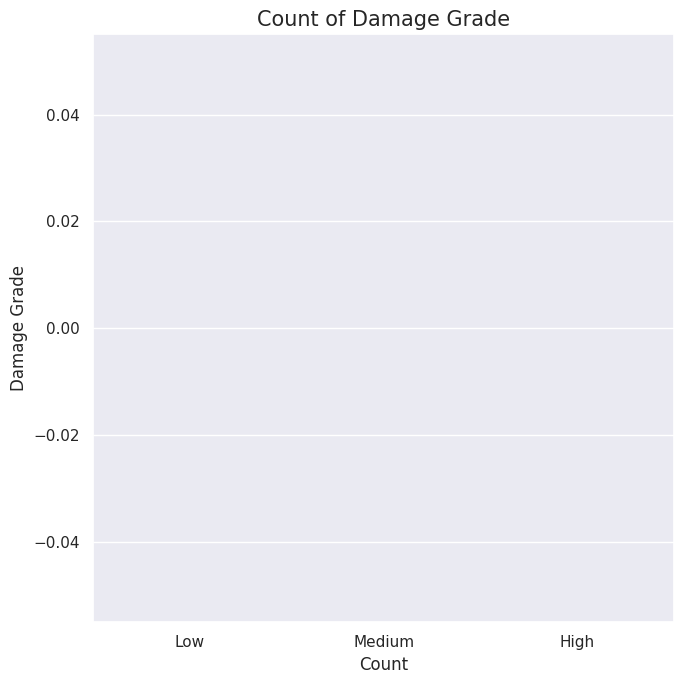

In [ ]:
plt.figure(figsize=(7,7))
sns.set_theme()
sns.countplot(train_df['damage_grade'], order=['Low', 'Medium', 'High'])
plt.xlabel('Count', fontsize=12)
plt.ylabel('Damage Grade', fontsize=12)
plt.title('Count of Damage Grade', fontsize=15)
plt.tight_layout()
plt.show()

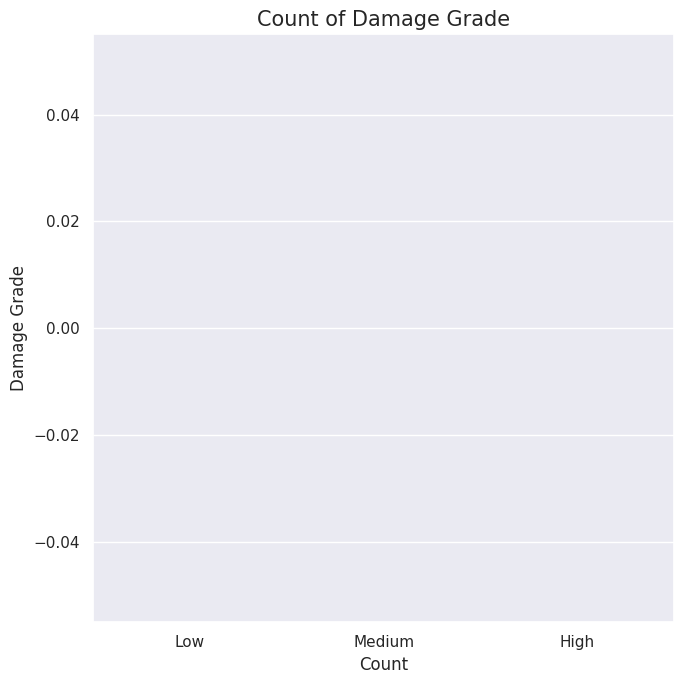

In [ ]:
plt.figure(figsize=(7,7))
sns.set_theme()
sns.countplot(train_df['damage_grade'], order=['Low', 'Medium', 'High'])
plt.xlabel('Count', fontsize=12)
plt.ylabel('Damage Grade', fontsize=12)
plt.title('Count of Damage Grade', fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
for col in train_df.columns:
  if train_df[col].dtype == 'object':
    print(f"'t' found in column: {col}")

't' found in column: land_surface_condition
't' found in column: foundation_type
't' found in column: roof_type
't' found in column: ground_floor_type
't' found in column: other_floor_type
't' found in column: position
't' found in column: plan_configuration
't' found in column: legal_ownership_status


In [ ]:
train_df['damage_grade'] = train_df['damage_grade'].astype('category')
train_df['damage_grade'] = train_df['damage_grade'].cat.rename_categories({1:'Low', 2:'Medium', 3:'High'})
features = train_df.copy()
features['damage_grade'] = features['damage_grade'].cat.rename_categories({'Low':1, 'Medium':2, 'High':3})
features['damage_grade'] = features['damage_grade'].astype('int64')
corr_matrix = features.select_dtypes(include=['int64']).corr()

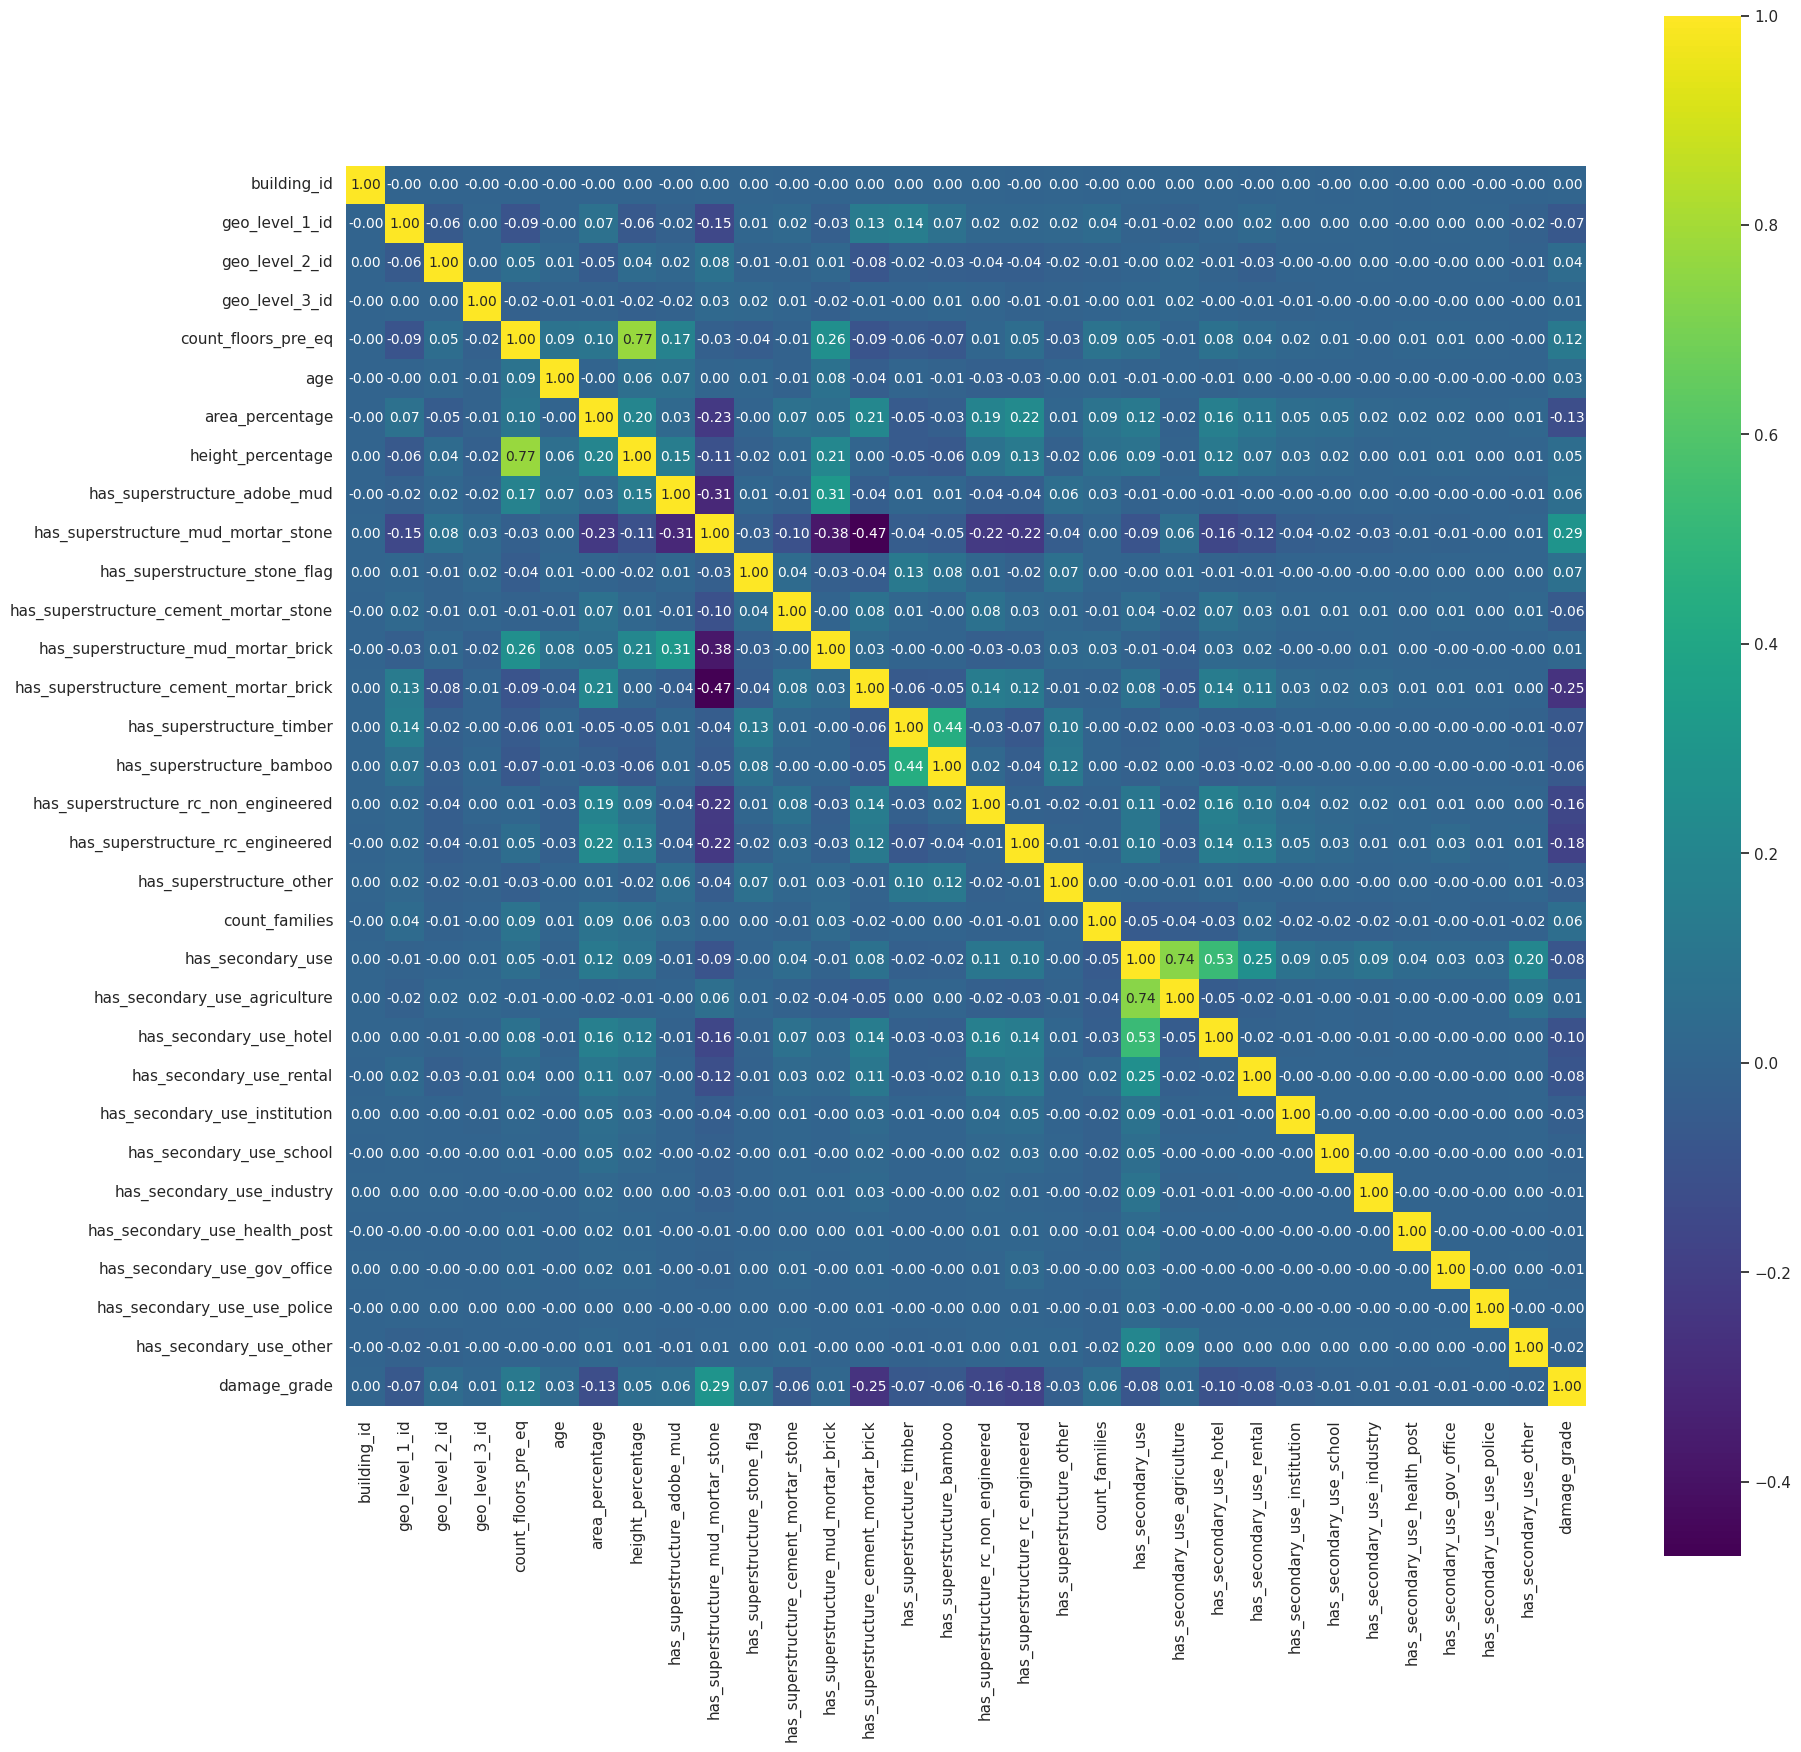

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

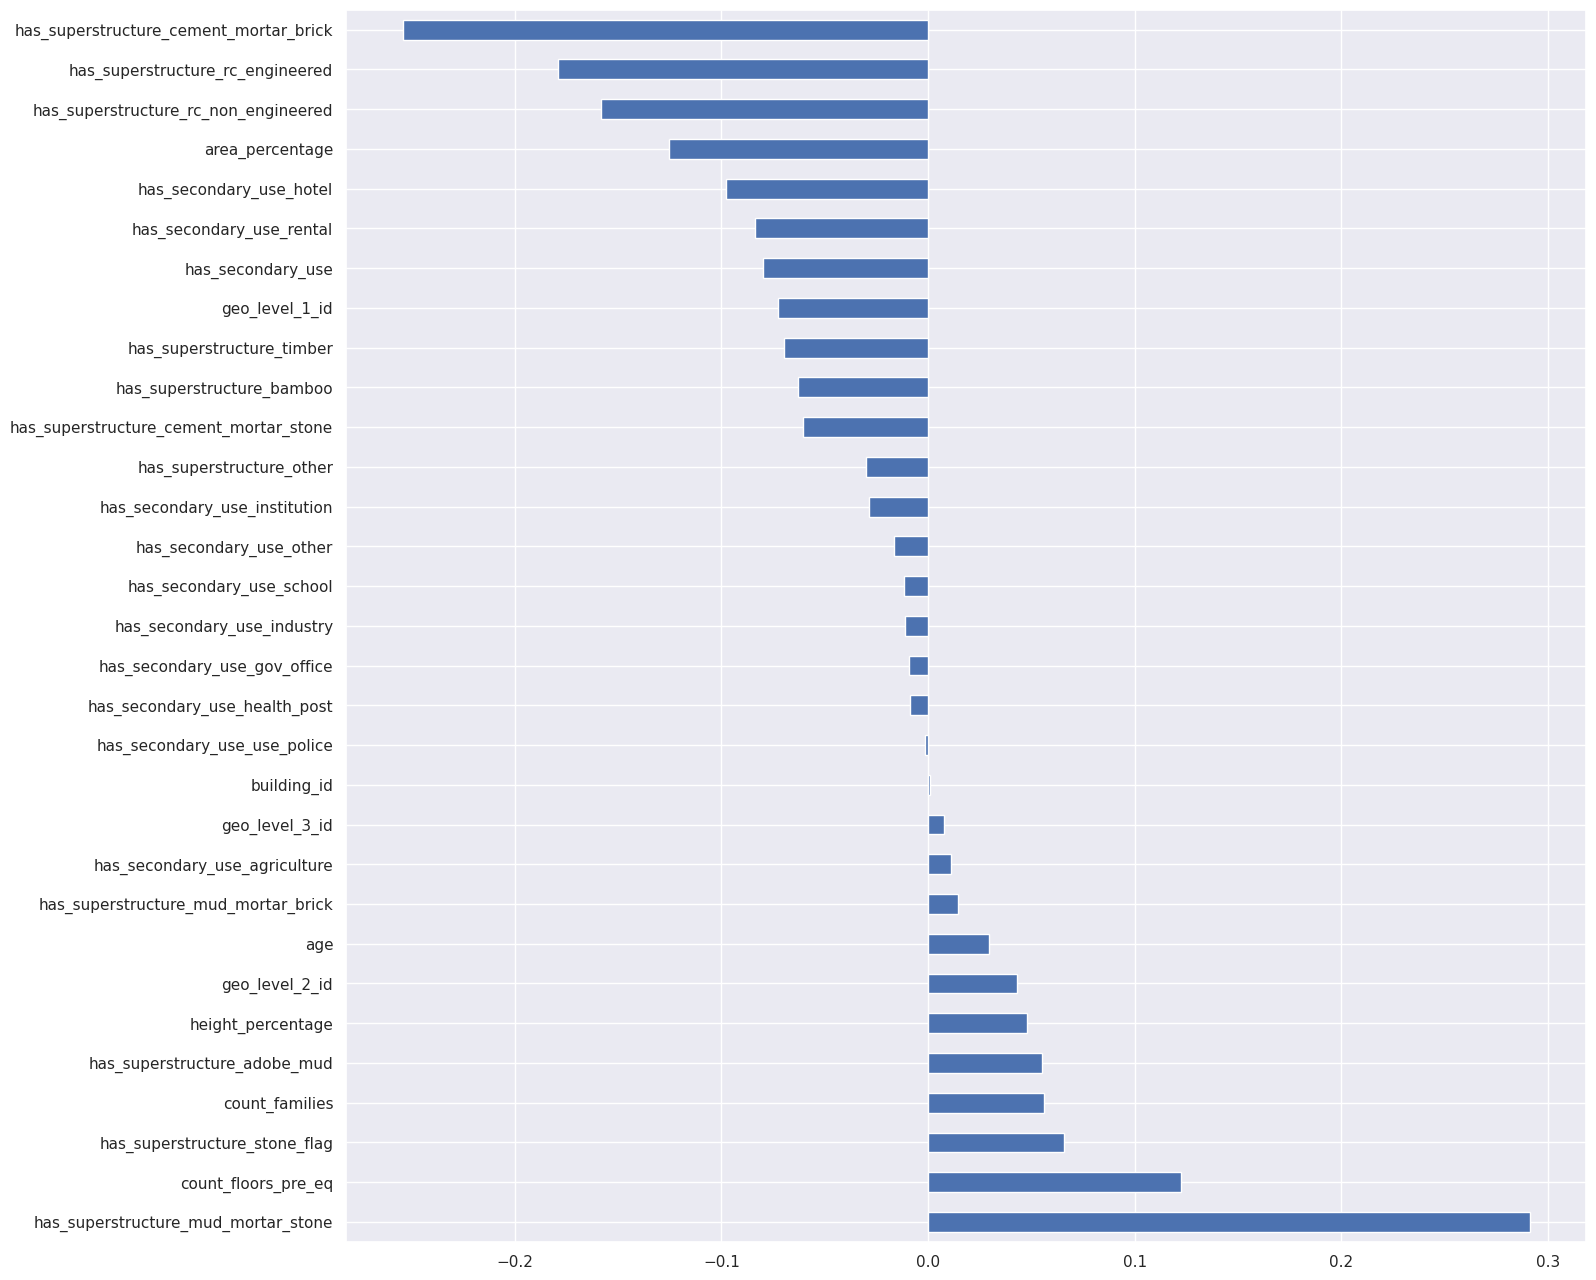

In [ ]:
plt.figure(figsize=(16,16))
corr_matrix['damage_grade'].drop('damage_grade').sort_values(ascending=False).plot(kind='barh')
plt.show()

Feature Selection

In [ ]:
df = features.copy()
df = df.set_index('building_id')
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])

In [ ]:
df_cat = pd.get_dummies(df_cat)
df_cat.head()

,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,False,False,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
28830,False,True,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
94947,False,False,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
590882,False,False,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
201944,False,False,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
df_cat.shape

(260601, 38)

In [ ]:
category_rank_feature = SelectKBest(score_func=chi2, k=38)
rank_feature = category_rank_feature.fit(df_cat, df_num['damage_grade'])
rank_feature.scores_

array([3.14202700e+02, 6.77046429e+01, 6.77640172e+01, 4.15860728e+02,
       2.79293047e+04, 6.39195232e+03, 5.49424844e+03, 8.31579458e+03,
       1.04584801e+03, 1.15697625e+03, 2.80485950e+04, 3.68489235e+03,
       9.75543604e+01, 3.24654211e+04, 6.05516649e+01, 1.22429528e+02,
       7.42291993e+03, 5.10846128e+03, 1.85494082e+04, 4.06602490e+02,
       2.59354872e+02, 1.48779877e+02, 4.93714399e+01, 6.22421247e+02,
       1.09200110e+02, 1.50572497e+02, 3.04753264e+01, 3.34305427e+00,
       1.36435198e+01, 1.65187836e+00, 5.72019260e+01, 3.23110604e+02,
       3.31565900e+01, 1.01176162e+03, 2.26362245e+03, 5.34417037e+01,
       3.96056239e+01, 2.29493063e+02])

In [ ]:
cat_score = pd.DataFrame(rank_feature.scores_, columns=['Score'])
cat_col = pd.DataFrame(df_cat.columns, columns=['Feature'])
univariate_cat_rank = pd.concat([cat_col, cat_score], axis=1)
univariate_cat_rank.set_index('Feature', inplace=True)
sorted_univariate_cat_rank = univariate_cat_rank.sort_values('Score', ascending=False)

In [ ]:
chi2_greater100 =sorted_univariate_cat_rank[sorted_univariate_cat_rank['Score']>100]

In [ ]:
chi2_greater100.head()

,Score
Feature,
ground_floor_type_v,32465.421066
roof_type_x,28048.595012
foundation_type_i,27929.304672
other_floor_type_s,18549.408221
foundation_type_w,8315.794578


**1 Model Building**

Data Preperation

In [ ]:
data = pd.concat([df_num, df_cat], axis=1)
y = data['damage_grade']
X = data[list(df_num.columns)+list(chi2_greater100.index)]
X.drop('damage_grade', axis=1, inplace=True)

<ipython-input-32-053984b01073>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('damage_grade', axis=1, inplace=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((208480, 55), (52121, 55), (208480,), (52121,))

Scaling Data

In [ ]:
scaler = StandardScaler()
scaled_col = [
'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
'count_floors_pre_eq', 'age', 'area_percentage',
'height_percentage'
]
X_train[scaled_col] = scaler.fit_transform(X_train[scaled_col])
X_test[scaled_col] = scaler.transform(X_test[scaled_col])

In [ ]:
def make_confusion_matrix(pred, title):
  cam = confusion_matrix(y_test, pred)
  sns.heatmap(cam, annot=True, cmap='viridis',
  xticklabels=['Low', 'Medium', 'High'],
  yticklabels=['Low', 'Medium', 'High'],
  fmt="d")
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix Using {} Algorithm'.format(title))
  plt.show()

**2 XG-Boost**

Average Training F1 Score (Micro) for Extreme Gradient Boosting is: 0.7239975057559478
              precision    recall  f1-score   support

           1       0.69      0.45      0.54      4979
           2       0.72      0.86      0.78     29703
           3       0.75      0.58      0.65     17439

    accuracy                           0.73     52121
   macro avg       0.72      0.63      0.66     52121
weighted avg       0.73      0.73      0.72     52121



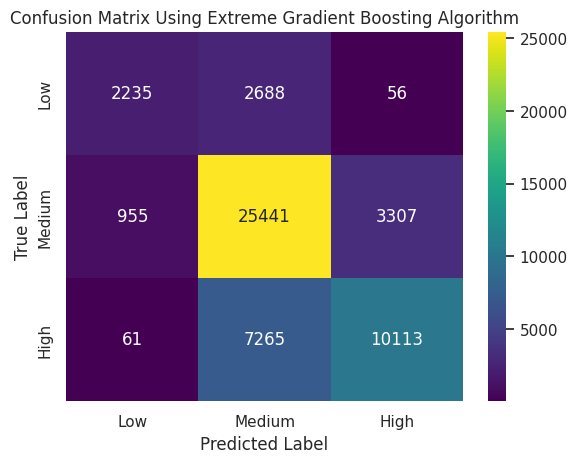

Average Test F1 Score (Micro) for Extreme Gradient Boosting is : 0.7250244623088582
Average Test Precision Score (Micro) for Extreme Gradient Boosting is : 0.7250244623088582
Average Test Recall Score (Micro) for Extreme Gradient Boosting is : 0.7250244623088582


In [ ]:
xgb_model = XGBClassifier(verbosity=0)
kfold = KFold(n_splits=10)
xgb_scores = cross_val_score(xgb_model, X_train, y_train-1, scoring="f1_micro",cv=kfold)
xgb_result = xgb_scores.mean()
print('Average Training F1 Score (Micro) for Extreme Gradient Boosting is: {}'.format(xgb_result))
xgb_model.fit(X_train, y_train-1)
y_pred = xgb_model.predict(X_test) + 1
print(classification_report(y_test, y_pred))
make_confusion_matrix(y_pred, 'Extreme Gradient Boosting')
print(f"Average Test F1 Score (Micro) for Extreme Gradient Boosting is : {f1_score(y_test, y_pred, average='micro')}")
print(f"Average Test Precision Score (Micro) for Extreme Gradient Boosting is : {precision_score(y_test, y_pred, average='micro')}")
print(f"Average Test Recall Score (Micro) for Extreme Gradient Boosting is : {recall_score(y_test, y_pred, average='micro')}")

**3. Random Forrest Classifier**

In [ ]:
rfc_model = RandomForestClassifier(n_estimators=100, random_state=0)
kfold = KFold(n_splits=10)
rfc_scores = cross_val_score(rfc_model, X_train, y_train, scoring="f1_micro", cv=kfold)
rfc_result = rfc_scores.mean()
print('Average Training F1 Score (Micro) for RFC is: {}'.format(rfc_result))
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)

Average Training F1 Score (Micro) for RFC is: 0.7145913277052955


              precision    recall  f1-score   support

           1       0.64      0.47      0.54      4979
           2       0.72      0.83      0.77     29703
           3       0.71      0.59      0.65     17439

    accuracy                           0.71     52121
   macro avg       0.69      0.63      0.65     52121
weighted avg       0.71      0.71      0.71     52121



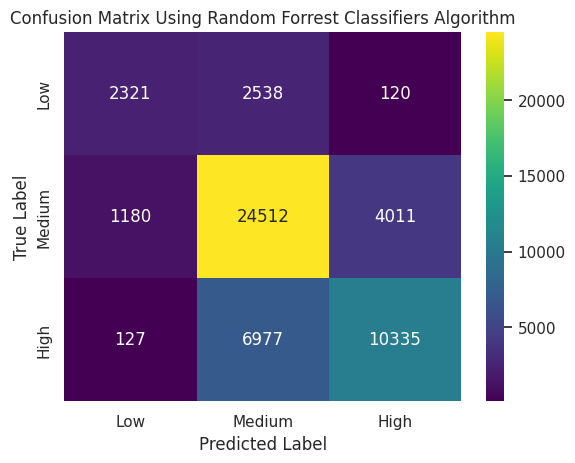

Average Test F1 Score (Micro) for RFC is :0.7131098789355539
Average Test Precision Score (Micro) for RFC is : 0.7131098789355538
Average Test Recall Score (Micro) for RFC is :0.7131098789355538


In [ ]:
print(classification_report(y_test, y_pred))
make_confusion_matrix(y_pred, 'Random Forrest Classifiers')
print(f"Average Test F1 Score (Micro) for RFC is :{f1_score(y_test, y_pred, average='micro')}")
print(f"Average Test Precision Score (Micro) for RFC is : {precision_score(y_test, y_pred, average='micro')}")
print(f"Average Test Recall Score (Micro) for RFC is :{recall_score(y_test, y_pred, average='micro')}")

**4 Naive-Bayes**

Average Training F1 Score (Micro) for Naive Bayes is : 0.4313651189562548
              precision    recall  f1-score   support

           1       0.39      0.53      0.45      4979
           2       0.66      0.15      0.25     29703
           3       0.40      0.88      0.55     17439

    accuracy                           0.43     52121
   macro avg       0.48      0.52      0.42     52121
weighted avg       0.55      0.43      0.37     52121



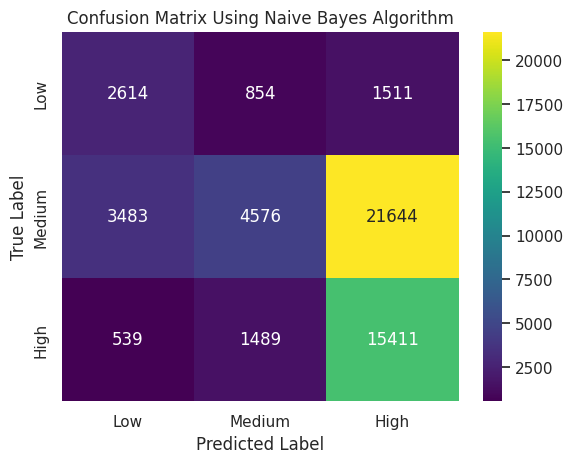

Average Test F1 Score (Micro) for Naive Bayes is : 0.43362560196465916
Average Test Precision Score (Micro) for Naive Bayes is : 0.43362560196465916
Average Test Recall Score (Micro) for Naive Bayes is : 0.43362560196465916


In [ ]:
nb_model = GaussianNB()
kfold = KFold(n_splits=10)
nb_scores = cross_val_score(nb_model, X_train, y_train, scoring="f1_micro", cv=kfold)
nb_result = nb_scores.mean()
print('Average Training F1 Score (Micro) for Naive Bayes is : {}'.format(nb_result))
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))
make_confusion_matrix(y_pred, 'Naive Bayes')
print(f"Average Test F1 Score (Micro) for Naive Bayes is : {f1_score(y_test, y_pred, average='micro')}")
print(f"Average Test Precision Score (Micro) for Naive Bayes is : {precision_score(y_test, y_pred, average='micro')}")
print(f"Average Test Recall Score (Micro) for Naive Bayes is : {recall_score(y_test, y_pred, average='micro')}")

**5. KNN**

Average Train F1 Score (Micro) for K-Nearest Neighbors is: 0.6554345740598618
              precision    recall  f1-score   support

           1       0.52      0.46      0.49      4979
           2       0.69      0.75      0.72     29703
           3       0.63      0.56      0.59     17439

    accuracy                           0.66     52121
   macro avg       0.61      0.59      0.60     52121
weighted avg       0.65      0.66      0.65     52121



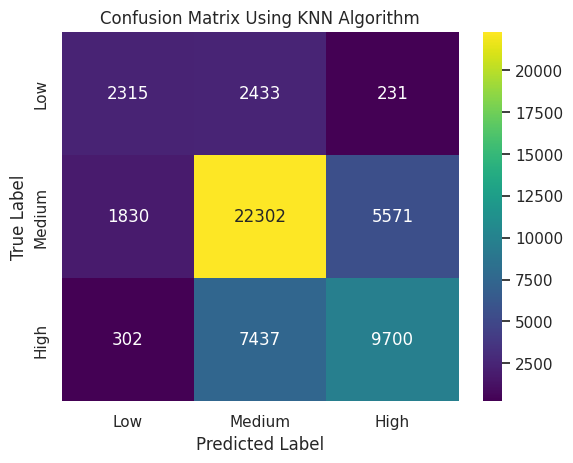

Average Test F1 Score (Micro) for K-Nearest Neighbors is :0.6584102377160838
Average Test Precision Score (Micro) for K-Nearest Neighbors is :0.6584102377160838
Average Test Recall Score (Micro) for K-Nearest Neighbors is :0.6584102377160838


In [ ]:
knn_model = KNeighborsClassifier()
kfold = KFold(n_splits=10)
knn_scores = cross_val_score(knn_model, X_train, y_train, scoring="f1_micro",cv=kfold)
knn_result = knn_scores.mean()
print('Average Train F1 Score (Micro) for K-Nearest Neighbors is: {}'.format(knn_result))
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))
make_confusion_matrix(y_pred, 'KNN')
print(f"Average Test F1 Score (Micro) for K-Nearest Neighbors is :{f1_score(y_test, y_pred, average='micro')}")
print(f"Average Test Precision Score (Micro) for K-Nearest Neighbors is :{precision_score(y_test, y_pred, average='micro')}")
print(f"Average Test Recall Score (Micro) for K-Nearest Neighbors is :{recall_score(y_test, y_pred, average='micro')}")

**6. Linear SVM**

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppr

Average Train F1 Score (Micro) for Linear SVM is: 0.5888190713737529


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.59      0.23      0.33      4979
           2       0.60      0.90      0.72     29703
           3       0.56      0.16      0.25     17439

    accuracy                           0.59     52121
   macro avg       0.58      0.43      0.43     52121
weighted avg       0.58      0.59      0.53     52121



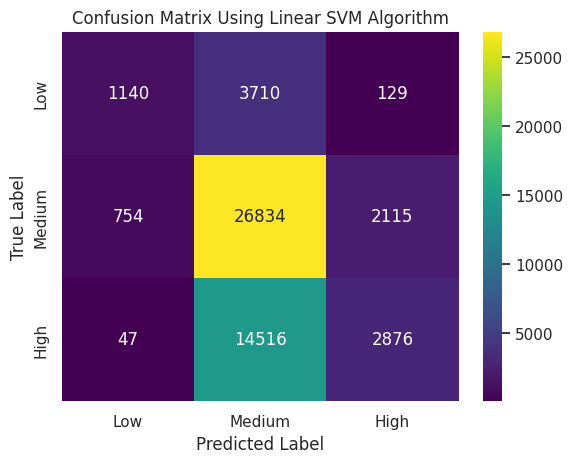

Average Test F1 Score (Micro) for Linear SVM is : 0.5918919437462827
Average Test Precision Score (Micro) for Linear SVM is :0.5918919437462827
Average Test Recall Score (Micro) for Linear SVM is :0.5918919437462827


In [ ]:
lin_svm_model = LinearSVC()
kfold = KFold(n_splits=5)
lin_svm_scores = cross_val_score(lin_svm_model, X_train, y_train, scoring="f1_micro", cv=kfold)
lin_svm_result = lin_svm_scores.mean()
print('Average Train F1 Score (Micro) for Linear SVM is: {}'.format(lin_svm_result))
lin_svm_model.fit(X_train, y_train)
y_pred = lin_svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
make_confusion_matrix(y_pred, 'Linear SVM')
print(f"Average Test F1 Score (Micro) for Linear SVM is : {f1_score(y_test,y_pred, average='micro')}")
print(f"Average Test Precision Score (Micro) for Linear SVM is :{precision_score(y_test, y_pred, average='micro')}")
print(f"Average Test Recall Score (Micro) for Linear SVM is :{recall_score(y_test, y_pred, average='micro')}")

6.1 Optimal Models are RFC and XGB. We will perform paramter tuning on these
models

In [ ]:
xgb_params = {'n_estimators':range(50, 201, 50), 'max_depth': range(3, 15)}
xgb_model_exp = XGBClassifier(verbosity=0)
kfold = KFold(n_splits=5)
rscv_xgb = RandomizedSearchCV(estimator=xgb_model_exp,param_distributions=xgb_params, n_iter=5,
scoring='f1_micro', cv=kfold, random_state=0, n_jobs=-1)
rscv_xgb.fit(X,y-1)
print(f"Best Parameters for XGBoost Classifier: {rscv_xgb.best_params_}")
print(f"Best Score for XGBoost Classifier: {rscv_xgb.best_score_}")

Best Parameters for XGBoost Classifier: {'n_estimators': 150, 'max_depth': 9}
Best Score for XGBoost Classifier: 0.7424108162889108


In [ ]:
params = {
'n_estimators': range(50, 251, 50),
'max_depth': range(15, 30),
'max_features': ['sqrt', 'log2', None]
}
rf_model = RandomForestClassifier(random_state=0)
kfold = KFold(n_splits=5)
rscv_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=params, n_iter=5, scoring='f1_micro', cv=kfold, random_state=0, n_jobs=-1)
rscv_rf.fit(X,y)
print("Optimal hyperparameter combination for RandomForestClassifier:", rscv_rf.best_params_)
print()
print("Mean cross-validated training accuracy score:", rscv_rf.best_score_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Optimal hyperparameter combination for RandomForestClassifier: {'n_estimators': 100, 'max_features': None, 'max_depth': 21}

Mean cross-validated training accuracy score: 0.7347707752120513


# **Final Models with optimal params**

              precision    recall  f1-score   support

           1       0.69      0.51      0.59      4979
           2       0.74      0.85      0.79     29703
           3       0.76      0.63      0.69     17439

    accuracy                           0.74     52121
   macro avg       0.73      0.66      0.69     52121
weighted avg       0.74      0.74      0.74     52121



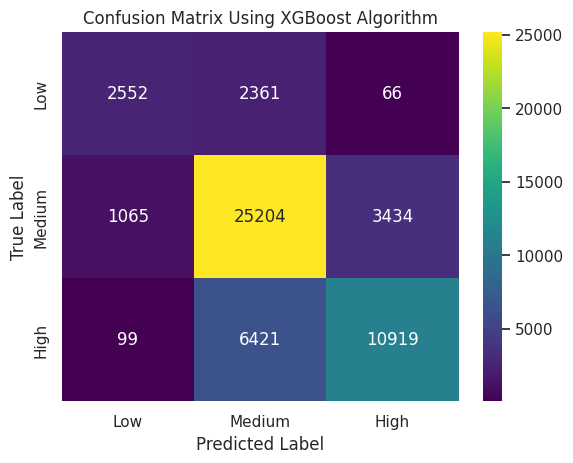

Average F1 Score (Micro) for Extreme Gradient Boosting is : 0.7420233686997565


In [ ]:
final_xgb_model = XGBClassifier(n_estimators= 150, max_depth = 9, random=0, verbosity=0)
final_xgb_model.fit(X_train, y_train-1)
y_pred = final_xgb_model.predict(X_test)+1
print(classification_report(y_test, y_pred))
make_confusion_matrix(y_pred, 'XGBoost')
print(f"Average F1 Score (Micro) for Extreme Gradient Boosting is : {f1_score(y_test, y_pred, average='micro')}")

In [ ]:
final_rfc_model = RandomForestClassifier(n_estimators = 100, max_features = None, max_depth = 21, random_state = 0)
final_rfc_model.fit(X_train, y_train)
y_pred = final_rfc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.66      0.48      0.56      4979
           2       0.74      0.84      0.79     29703
           3       0.75      0.63      0.68     17439

    accuracy                           0.74     52121
   macro avg       0.72      0.65      0.68     52121
weighted avg       0.73      0.74      0.73     52121



Test Label Predictions

In [ ]:
test_value.drop_duplicates(inplace=True, keep = 'last')
test_value.dropna(inplace=True)
test_df_int = test_value.select_dtypes(include=['int64', 'float64'])
test_df_cat = test_value.select_dtypes(include=['object'])
test_df_cat = pd.get_dummies(test_df_cat)
chi2_greater100_columns = [i for i in chi2_greater100.index if i !='damage_grade']
int_columns = [i for i in df_num.columns if i != 'damage_grade']
test_data = pd.concat([test_df_int, test_df_cat], axis=1)
X_Test = test_data[int_columns+chi2_greater100_columns]
X_Test[scaled_col] = scaler.transform(X_Test[scaled_col])

<ipython-input-49-7a4fe6d4312c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Test[scaled_col] = scaler.transform(X_Test[scaled_col])


In [ ]:
xgb_pred = final_xgb_model.predict(X_Test)+1
rfc_pred = final_rfc_model.predict(X_Test)
xgb_pred = pd.concat([test_value['building_id'], pd.Series(xgb_pred,name='damage_grade')], axis=1)
rfc_pred = pd.concat([test_value['building_id'], pd.Series(rfc_pred,name='damage_grade')], axis=1)

In [ ]:
xgb_pred.to_csv('xgb_pred.csv', index=False, header=True)
rfc_pred.to_csv('rfc_pred.csv', index=False, header=True)

In [ ]:
rfc_params = {
'random_state': 42,
'n_estimators': 200,
'max_depth': 40,
'min_samples_split': 7,
'criterion': 'gini',
'max_features': 'sqrt',
'max_samples': None,
'min_impurity_decrease': 0.0,
'bootstrap': True,
'min_samples_leaf': 1
}

xgb_params = {
'random_state': 42,
'n_estimators': 200,
'max_depth': 40,
'max_samples': None,
}

              precision    recall  f1-score   support

           1       0.69      0.44      0.54      4979
           2       0.72      0.86      0.78     29703
           3       0.75      0.58      0.65     17439

    accuracy                           0.73     52121
   macro avg       0.72      0.63      0.66     52121
weighted avg       0.73      0.73      0.72     52121



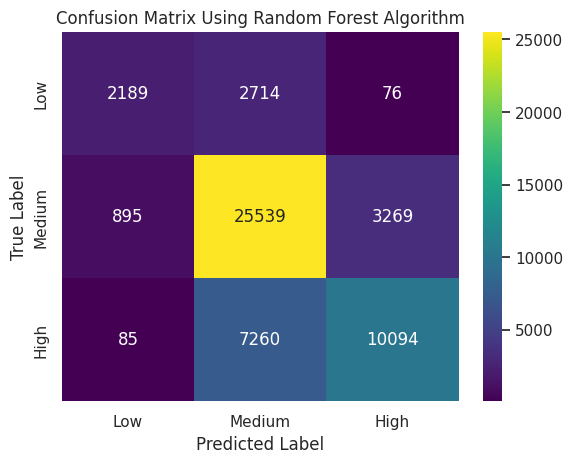

Average F1 Score (Micro) for Random Forest is :0.7256576044204831


In [ ]:
trial_rfc = RandomForestClassifier(**rfc_params)
trial_rfc.fit(X_train, y_train)
y_pred = trial_rfc.predict(X_test)
print(classification_report(y_test, y_pred))
make_confusion_matrix(y_pred, 'Random Forest')
print(f"Average F1 Score (Micro) for Random Forest is :{f1_score(y_test,y_pred, average='micro')}")

              precision    recall  f1-score   support

           1       0.62      0.52      0.57      4979
           2       0.74      0.80      0.77     29703
           3       0.71      0.64      0.67     17439

    accuracy                           0.72     52121
   macro avg       0.69      0.65      0.67     52121
weighted avg       0.72      0.72      0.72     52121



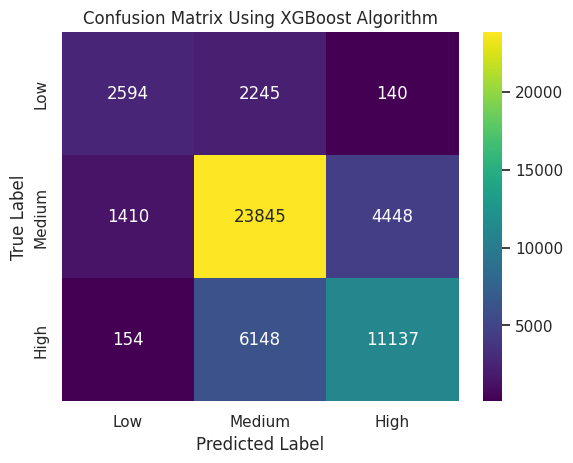

Average F1 Score (Micro) for Extreme Gradient Boosting is :0.7209378177701886


In [ ]:
trial_xgb = XGBClassifier(**xgb_params)
trial_xgb.fit(X_train, y_train-1)
y_pred = trial_xgb.predict(X_test)+1
print(classification_report(y_test, y_pred))
make_confusion_matrix(y_pred, 'XGBoost')
print(f"Average F1 Score (Micro) for Extreme Gradient Boosting is :{f1_score(y_test, y_pred, average='micro')}")


In [ ]:
xgb_pred = trial_xgb.predict(X_Test)+1
rfc_trial_pred = trial_rfc.predict(X_Test)
xgb_pred = pd.concat([test_value['building_id'], pd.Series(xgb_pred,name='damage_grade')], axis=1)
rfc_trial_pred = pd.concat([test_value['building_id'], pd.Series(rfc_trial_pred, name='damage_grade')], axis=1)

In [ ]:
rfc_trial_pred.to_csv('rfc_trial_pred.csv', index=False, header=True)
xgb_pred.to_csv('xgb_trial_pred.csv', index=False, header=True)